****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('PETR4_2018-07-02_2018-07-31.csv')

In [3]:
data_frame.count()

Start                        2497
End                          2497
NegociatedOffersAmount       2497
TotalTradedQuantity          2497
RSIIndicator                 2497
SMAIndicatorDiff             2497
EMAIndicatorDiff             2497
UpperBollingerBand           2497
LowerBollingerBand           2497
MiddleBollingerBand          2497
MACD                         2497
AroonUpIndicator             2497
AroonDownIndicator           2497
AroonIndicator               2497
PlusDirectionalIndicator     2497
MinusDirectionalIndicator    2497
ADXIndicator                 2497
CCI                          2497
CMO                          2497
ROC                          2497
BuySignal                    2497
BidPrice                     2497
Profit                       2497
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.619142971565879

In [5]:
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,02/07/2018 11:26:00,02/07/2018 11:29:00,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,02/07/2018 11:29:00,02/07/2018 11:32:00,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,02/07/2018 11:32:00,02/07/2018 11:35:00,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,02/07/2018 11:35:00,02/07/2018 11:38:00,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,02/07/2018 11:38:00,02/07/2018 11:41:00,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


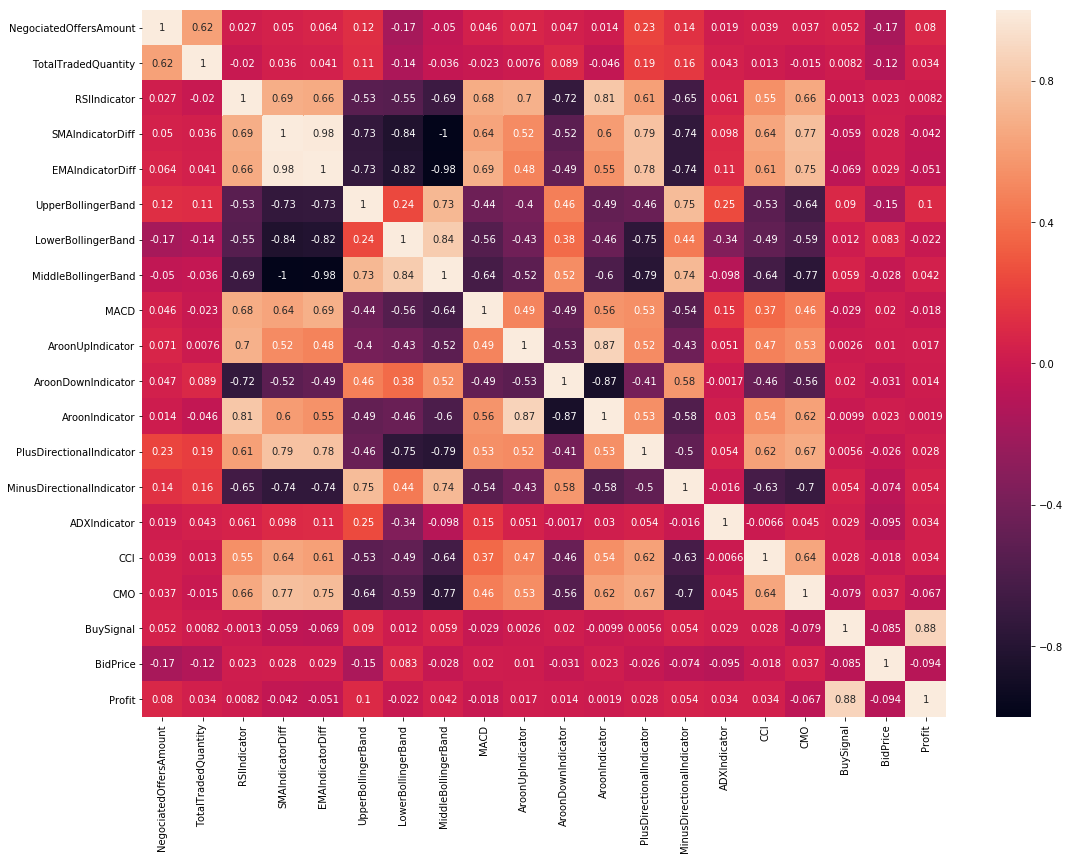

In [6]:
temp = data_frame.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
x_train = data_frame.drop(["Start", "End"], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


In [8]:
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,4.927254,11.863582,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,4.897840,11.433882,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,4.955827,11.675894,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,5.442418,13.319902,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,5.575949,12.736701,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


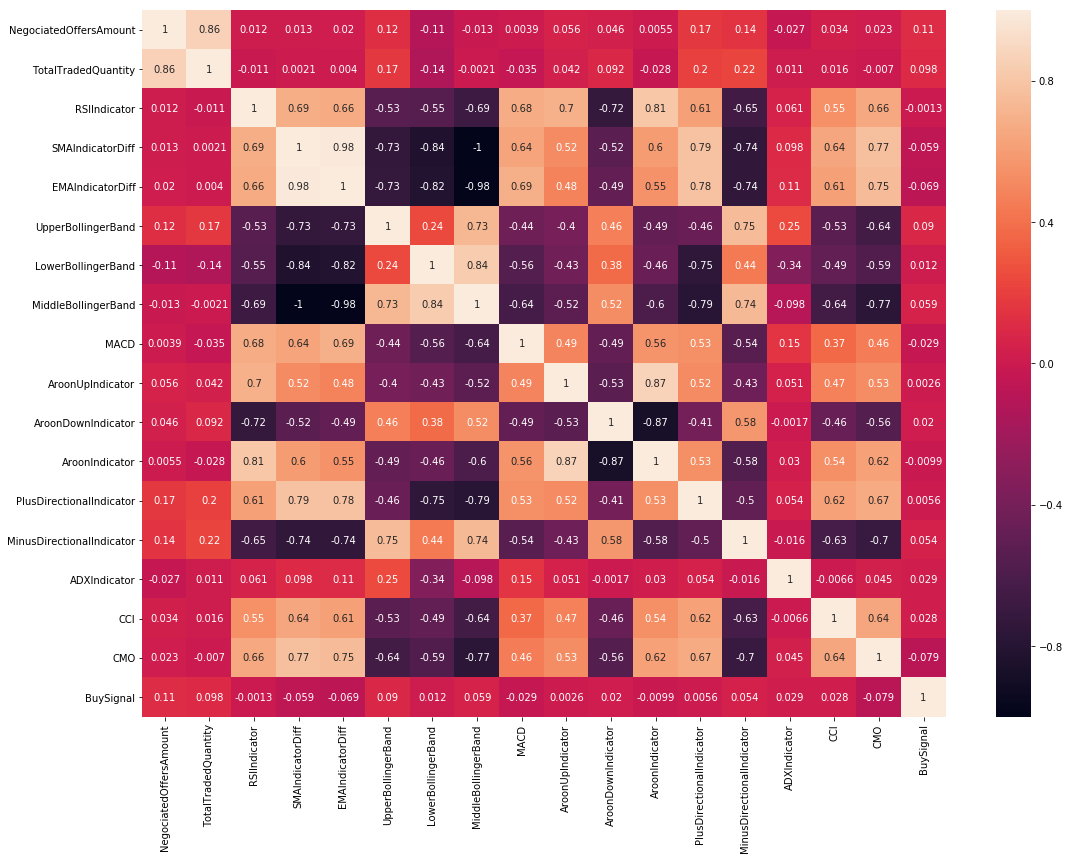

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

profit = x_train["Profit"]
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

temp = x_train.drop(["ROC", "BidPrice","Profit"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

x_train = x_train.dropna()
#y_train = x_train["BuySignal"]
#x_train = x_train.drop(["BidPrice"], axis=1)

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [25]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from random import randint

average_data_per_day = 120
max_days_interval = 20
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day
days = []
logreg_precisions = []
logreg_recalls = []
logreg_f1 = []
logreg_profit = []
logreg_random_profit = []
mlp_precisions = []
mlp_recalls = []
mlp_f1 = []
mlp_profit = []
mlp_random_profit = []

mlp_total_profit = []
logreg_total_profit = []
price_variation = []

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    mlp_profit_arr = []
    logreg_profit_arr = []
    mlp_random_profit_arr = []
    logreg_random_profit_arr = []
    mlp_f1_arr = []
    logreg_f1_arr = []
    
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day      
        
        if (day == 1): 
            start_price = x_train['BidPrice'].as_matrix()[middle_range]
            end_price = x_train['BidPrice'].as_matrix()[len(x_train.index) - 1]
            price_variation.append(end_price - start_price)
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
                        
            day_mlp_profit_arr = []
            day_logreg_profit_arr = []
            day_random_mlp_profit_arr = []
            day_random_logreg_profit_arr = []
            #print("(MiddleRange,MaxRange): (" + str(middle_range) + "," + str (max_range) + ")")
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            
            current_profit = profit[middle_range:max_range]
            
            #print ("Distribution before: " + str(len(x_train[min_range:middle_range][x_train[min_range:middle_range]['BuySignal'] == 1].index)/len(x_train[min_range:middle_range].index)))
            
            g = x_train[min_range:middle_range].groupby('BuySignal')
            x_train_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
            #print ("Distribution after: " + str(len(x_train_balanced[x_train_balanced['BuySignal'] == 1].index)/len(x_train_balanced.index)))
            
            new_mlp.fit(x_train_balanced.drop(["BuySignal", "Profit", "BidPrice"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_mlp.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit", "BidPrice"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_mlp_profit_arr.append(current_profit.as_matrix()[s])
                    day_random_mlp_profit_arr.append(current_profit.as_matrix()[randint(0, len(y_predict) - 1)])
            
            #print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_mlp_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            mlp_score_arr.append(mlp_score)
            
            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train_balanced.drop(["BuySignal", "Profit", "BidPrice"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_logreg.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit", "BidPrice"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_logreg_profit_arr.append(current_profit.as_matrix()[s])
                    day_random_logreg_profit_arr.append(current_profit.as_matrix()[randint(0, len(y_predict) - 1)])
                  
            #print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_logreg_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_logreg_score_arr.append(acc_logreg_score)
            logreg_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            logreg_score_arr.append(logreg_score)
            
            mlp_profit_arr.append(np.sum(day_mlp_profit_arr))
            logreg_profit_arr.append(np.sum(day_logreg_profit_arr))
            mlp_random_profit_arr.append(np.sum(day_random_mlp_profit_arr))
            logreg_random_profit_arr.append(np.sum(day_random_logreg_profit_arr))
                                                        
      
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    print ("MLP Average f1 Score: " + str(np.sum(mlp_f1_arr)/len(mlp_f1_arr)))
    print ("MLP Average Profit: " + str(np.sum(mlp_profit_arr)/len(mlp_profit_arr)))
    print ("MLP Random Average Profit: " + str(np.sum(mlp_random_profit_arr)/len(mlp_random_profit_arr)))
      
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))
    print ("LogReg Average f1 Score: " + str(np.sum(logreg_f1_arr)/len(logreg_f1_arr)))
    print ("LogReg Average Profit: " + str(np.sum(logreg_profit_arr)/len(logreg_profit_arr)))
    print ("LogReg Random Average Profit: " + str(np.sum(logreg_random_profit_arr)/len(logreg_random_profit_arr)))
    
    logreg_precisions.append(np.sum(logreg_precision_arr)/len(logreg_precision_arr))
    logreg_recalls.append(np.sum(logreg_recall_arr)/len(logreg_recall_arr))
    logreg_f1.append(np.sum(logreg_f1_arr)/len(logreg_f1_arr))
    logreg_profit.append(np.sum(logreg_profit_arr)/len(logreg_profit_arr))
    logreg_total_profit.append(np.sum(logreg_profit_arr))
    logreg_random_profit.append(np.sum(logreg_random_profit_arr)/len(logreg_random_profit_arr))
                                                        
    mlp_precisions.append(np.sum(mlp_precision_arr)/len(mlp_precision_arr))
    mlp_recalls.append(np.sum(mlp_recall_arr)/len(mlp_recall_arr))
    mlp_f1.append(np.sum(mlp_f1_arr)/len(mlp_f1_arr))
    mlp_profit.append(np.sum(mlp_profit_arr)/len(mlp_profit_arr))
    mlp_total_profit.append(np.sum(mlp_profit_arr))
    mlp_random_profit.append(np.sum(mlp_random_profit_arr)/len(mlp_random_profit_arr))
    days.append(day)

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.5275386597938143
MLP Average Balanced Accuracy Score: 0.527659880930789
MLP Average Precision Score: 0.6431152598193786
MLP Average Recall Score: 0.5170869182782949
MLP Average f1 Score: 0.566111838952342
MLP Average Profit: 0.087
MLP Random Average Profit: 0.05850000000000015
LogReg Average Accuracy Score: 0.549643470790378
LogReg Average Balanced Accuracy Score: 0.536711590071417
LogReg Average Precision Score: 0.6499051840084108
LogReg Average Recall Score: 0.5870241862920038
LogReg Average f1 Score: 0.6039143419377773
LogReg Average Profit: 0.10499999999999983
LogReg Random Average Profit: 0.05349999999999966
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5314116476758909
MLP Average Balanced Accuracy Score: 0.5248374381953972
MLP Average Precision Score: 0.6543205606871384
MLP Average Recall Score: 0.5688317033912539
MLP Average f1 Score: 0.5719826865558507
MLP Average Profit: 

MLP Average Accuracy Score: 0.5608140034364262
MLP Average Balanced Accuracy Score: 0.5602895648420079
MLP Average Precision Score: 0.6286703730328957
MLP Average Recall Score: 0.5140107612824966
MLP Average f1 Score: 0.5587781837851683
MLP Average Profit: 0.06124999999999928
MLP Random Average Profit: -0.024999999999999432
LogReg Average Accuracy Score: 0.5451890034364261
LogReg Average Balanced Accuracy Score: 0.548974802993218
LogReg Average Precision Score: 0.6267925174075757
LogReg Average Recall Score: 0.4765685248426633
LogReg Average f1 Score: 0.5390741001705501
LogReg Average Profit: 0.042499999999999497
LogReg Random Average Profit: -0.02875000000000099
Days used to train: 14
Days to be predicted: 1
MLP Average Accuracy Score: 0.5391138929798724
MLP Average Balanced Accuracy Score: 0.5406003572760653
MLP Average Precision Score: 0.6110303901035324
MLP Average Recall Score: 0.49128780133489586
MLP Average f1 Score: 0.5362339322552939
MLP Average Profit: 0.021428571428571377
ML

In [26]:
def performance_plot(days, precision, recall, f1, figsize, title, precision_xytextpos, recall_xytextpos, f1_xytextpos):

    plt.figure(1, figsize=figsize)

    plt.subplot(111)
    lines = plt.plot(days, precision, days, recall, days, f1)
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.setp(lines[2], linewidth=2)
    plt.legend(('Precisões', 'Realocações', 'F1'),
            loc='lower right')
    plt.title(title)

    xy_precision = (precision.index(max(precision)) + 1, max(precision))
    xy_recall = (recall.index(max(recall)) + 1, max(recall))
    xy_f1 = (f1.index(max(f1)) + 1, max(f1))

    plt.annotate(str(xy_precision), xy=xy_precision, xytext=precision_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_recall), xy=xy_recall, xytext=recall_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_f1), xy=xy_f1, xytext=f1_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    
    plt.ylim(0.5, .8)
    plt.ylabel('Performance')
    plt.xlabel('Dias de Treino')
    plt.xlim(1,120)
    plt.show()

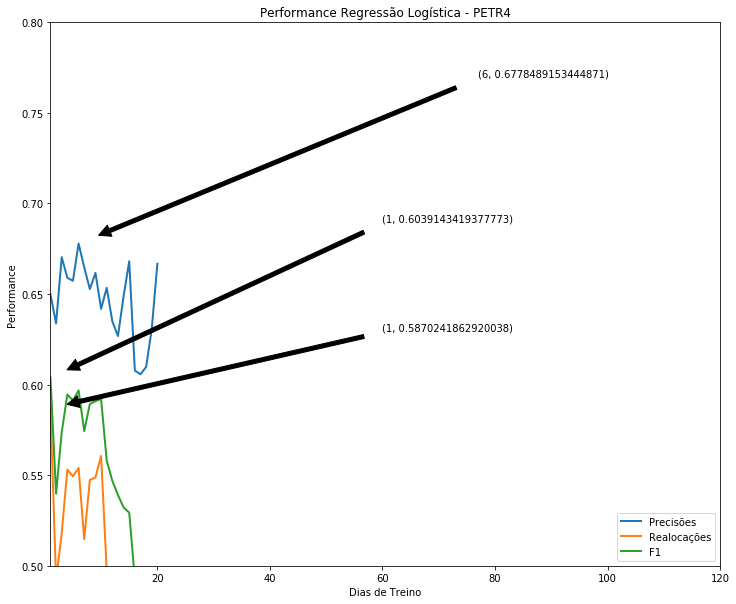

In [27]:
performance_plot(days, logreg_precisions, logreg_recalls, logreg_f1,(12,10), 'Performance Regressão Logística - PETR4', (77, 0.77),(60, 0.63),(60, 0.69))

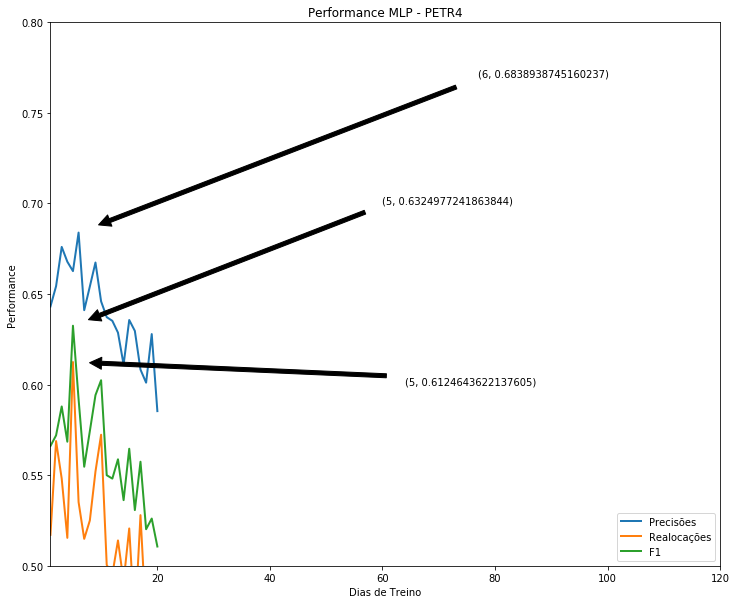

In [28]:
performance_plot(days, mlp_precisions, mlp_recalls, mlp_f1, (12,10), 'Performance MLP - PETR4', (77, 0.77),(64, 0.6),(60, 0.7))

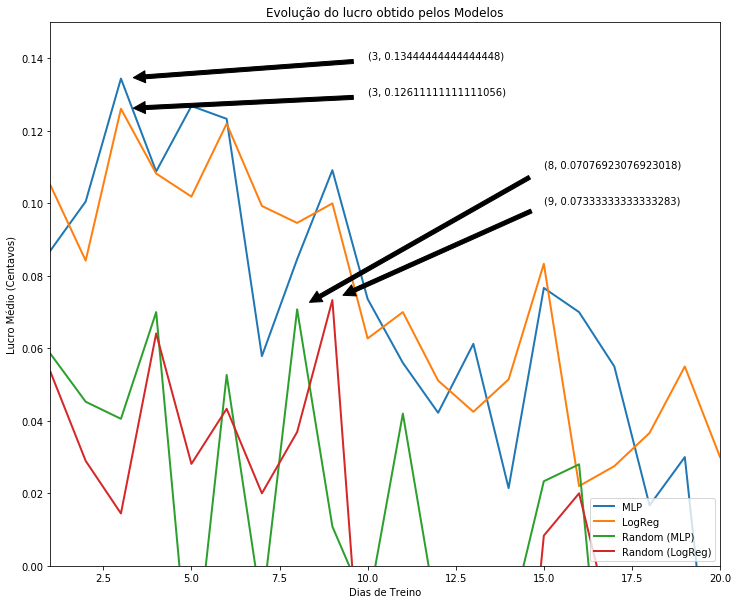

In [29]:
plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_profit, days, logreg_profit, days, mlp_random_profit, days, logreg_random_profit)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], linewidth=2)
plt.setp(lines[3], linewidth=2)
plt.legend(('MLP', 'LogReg', 'Random (MLP)', 'Random (LogReg)'),
        loc='lower right')
plt.title("Evolução do lucro obtido pelos Modelos")

xy_mlp = (mlp_profit.index(max(mlp_profit)) + 1, max(mlp_profit))
xy_logreg = (logreg_profit.index(max(logreg_profit)) + 1, max(logreg_profit))

xy_random_mlp = (mlp_random_profit.index(max(mlp_random_profit)) + 1, max(mlp_random_profit))
xy_random_logreg = (logreg_random_profit.index(max(logreg_random_profit)) + 1, max(logreg_random_profit))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(10,0.14),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(10,0.13),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_mlp), xy=xy_random_mlp, xytext=(15,0.11),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_logreg), xy=xy_random_logreg, xytext=(15,0.10),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-0.0, 0.15)
plt.xlim(1,20)
plt.ylabel('Lucro Médio (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()

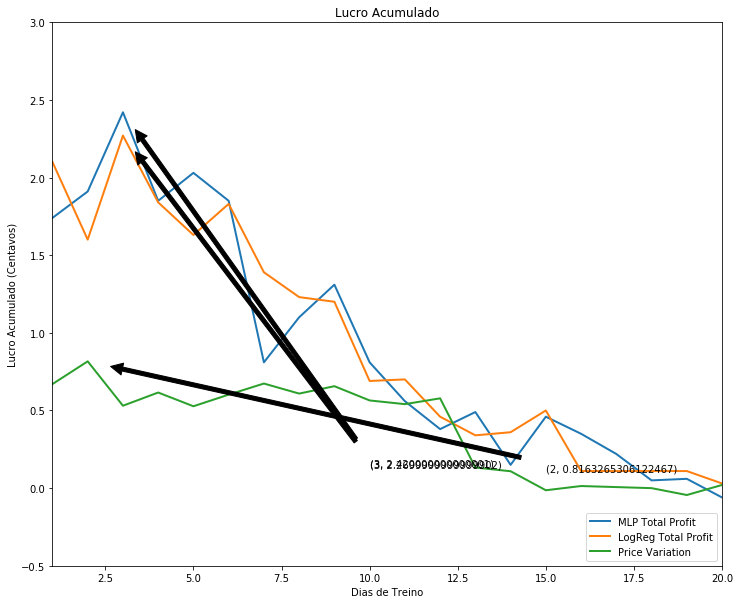

In [32]:
plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_total_profit, days, logreg_total_profit, days, price_variation)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], linewidth=2)
plt.legend(('MLP Total Profit', 'LogReg Total Profit', 'Price Variation'),
        loc='lower right')
plt.title("Lucro Acumulado")

xy_mlp = (mlp_total_profit.index(max(mlp_total_profit)) + 1, max(mlp_total_profit))
xy_logreg = (logreg_total_profit.index(max(logreg_total_profit)) + 1, max(logreg_total_profit))

xy_random_mlp = (price_variation.index(max(price_variation)) + 1, max(price_variation))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(10,0.14),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(10,0.13),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_mlp), xy=xy_random_mlp, xytext=(15,0.11),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-0.5, 3)
plt.xlim(1,20)
plt.ylabel('Lucro Acumulado (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()

In [31]:
price_variation

[0.6700680272108857,
 0.8163265306122467,
 0.5306122448979602,
 0.6156462585034026,
 0.5272108843537424,
 0.6020408163265314,
 0.6734693877551026,
 0.6088435374149679,
 0.6564625850340144,
 0.5646258503401365,
 0.5408163265306127,
 0.5782312925170086,
 0.13265306122448983,
 0.10884353741496611,
 -0.01360544217687032,
 0.013605442176872096,
 0.006802721088435604,
 0.0,
 -0.04421768707482965,
 0.02040816326530681]